In [110]:
# A)
import seaborn as sns

data = sns.load_dataset("mpg")

In [111]:
# B)
data.head(11)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


In [112]:
data.dropna()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [113]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


<Axes: xlabel='mpg', ylabel='weight'>

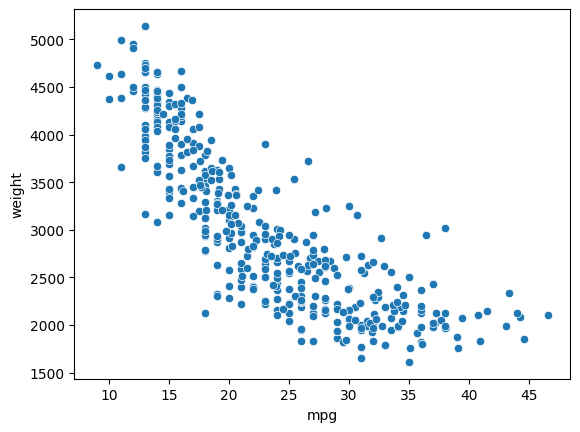

In [115]:
sns.scatterplot(data, x="mpg", y="weight")

In [116]:
# C)
import pandas as pd

data = pd.get_dummies(data, columns=["origin"], drop_first=True)

data = data.drop(columns=["name"])


In [117]:
X = data.drop(columns=["mpg"])
y = data["mpg"]

In [118]:
# D)

X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin_japan  398 non-null    bool   
 7   origin_usa    398 non-null    bool   
dtypes: bool(2), float64(3), int64(3)
memory usage: 19.6 KB
<class 'pandas.core.series.Series'>
RangeIndex: 398 entries, 0 to 397
Series name: mpg
Non-Null Count  Dtype  
--------------  -----  
398 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [119]:
# E)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

scaler = StandardScaler() #MinMaxScaler

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
# F)
import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"), #input_shape = (X_train.shape[1],)),
    layers.Dense(32, activation="relu"),
    layers.Dense(1)
])

In [ ]:
model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mae"])

In [145]:
# H)
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

Epoch 1/50


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "c:\Users\MaxF�rsntr�m-AI23GBG\djup_maskin\Deep-Machinelearning\.venv\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "c:\Users\MaxF�rsntr�m-AI23GBG\djup_maskin\Deep-Machinelearning\.venv\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "c:\Users\MaxF�rsntr�m-AI23GBG\djup_maskin\Deep-Machinelearning\.venv\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "c:\Users\MaxF�rsntr�m-AI23GBG\djup_maskin\Deep-Machinelearning\.venv\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\asyncio\base_events.py", line 608, in run_forever

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\asyncio\base_events.py", line 1936, in _run_once

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\asyncio\events.py", line 84, in _run

  File "c:\Users\MaxF�rsntr�m-AI23GBG\djup_maskin\Deep-Machinelearning\.venv\Lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "c:\Users\MaxF�rsntr�m-AI23GBG\djup_maskin\Deep-Machinelearning\.venv\Lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "c:\Users\MaxF�rsntr�m-AI23GBG\djup_maskin\Deep-Machinelearning\.venv\Lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "c:\Users\MaxF�rsntr�m-AI23GBG\djup_maskin\Deep-Machinelearning\.venv\Lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "c:\Users\MaxF�rsntr�m-AI23GBG\djup_maskin\Deep-Machinelearning\.venv\Lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "c:\Users\MaxF�rsntr�m-AI23GBG\djup_maskin\Deep-Machinelearning\.venv\Lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "c:\Users\MaxF�rsntr�m-AI23GBG\djup_maskin\Deep-Machinelearning\.venv\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "c:\Users\MaxF�rsntr�m-AI23GBG\djup_maskin\Deep-Machinelearning\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "c:\Users\MaxF�rsntr�m-AI23GBG\djup_maskin\Deep-Machinelearning\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "c:\Users\MaxF�rsntr�m-AI23GBG\djup_maskin\Deep-Machinelearning\.venv\Lib\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner

  File "c:\Users\MaxF�rsntr�m-AI23GBG\djup_maskin\Deep-Machinelearning\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "c:\Users\MaxF�rsntr�m-AI23GBG\djup_maskin\Deep-Machinelearning\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "c:\Users\MaxF�rsntr�m-AI23GBG\djup_maskin\Deep-Machinelearning\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\MaxF�rsntr�m-AI23GBG\AppData\Local\Temp\ipykernel_9860\2001399486.py", line 2, in <module>

  File "c:\Users\MaxF�rsntr�m-AI23GBG\djup_maskin\Deep-Machinelearning\.venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Users\MaxF�rsntr�m-AI23GBG\djup_maskin\Deep-Machinelearning\.venv\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 320, in fit

  File "c:\Users\MaxF�rsntr�m-AI23GBG\djup_maskin\Deep-Machinelearning\.venv\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 121, in one_step_on_iterator

  File "c:\Users\MaxF�rsntr�m-AI23GBG\djup_maskin\Deep-Machinelearning\.venv\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 108, in one_step_on_data

  File "c:\Users\MaxF�rsntr�m-AI23GBG\djup_maskin\Deep-Machinelearning\.venv\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 54, in train_step

  File "c:\Users\MaxF�rsntr�m-AI23GBG\djup_maskin\Deep-Machinelearning\.venv\Lib\site-packages\keras\src\trainers\trainer.py", line 398, in _compute_loss

  File "c:\Users\MaxF�rsntr�m-AI23GBG\djup_maskin\Deep-Machinelearning\.venv\Lib\site-packages\keras\src\trainers\trainer.py", line 366, in compute_loss

  File "c:\Users\MaxF�rsntr�m-AI23GBG\djup_maskin\Deep-Machinelearning\.venv\Lib\site-packages\keras\src\trainers\compile_utils.py", line 618, in __call__

  File "c:\Users\MaxF�rsntr�m-AI23GBG\djup_maskin\Deep-Machinelearning\.venv\Lib\site-packages\keras\src\trainers\compile_utils.py", line 659, in call

  File "c:\Users\MaxF�rsntr�m-AI23GBG\djup_maskin\Deep-Machinelearning\.venv\Lib\site-packages\keras\src\losses\loss.py", line 60, in __call__

  File "c:\Users\MaxF�rsntr�m-AI23GBG\djup_maskin\Deep-Machinelearning\.venv\Lib\site-packages\keras\src\losses\losses.py", line 27, in call

  File "c:\Users\MaxF�rsntr�m-AI23GBG\djup_maskin\Deep-Machinelearning\.venv\Lib\site-packages\keras\src\losses\losses.py", line 1870, in sparse_categorical_crossentropy

  File "c:\Users\MaxF�rsntr�m-AI23GBG\djup_maskin\Deep-Machinelearning\.venv\Lib\site-packages\keras\src\ops\nn.py", line 1559, in sparse_categorical_crossentropy

  File "c:\Users\MaxF�rsntr�m-AI23GBG\djup_maskin\Deep-Machinelearning\.venv\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 43 which is outside the valid range of [0, 1).  Label values: 40 28 43 19 26 31 22 13 29 14 17 36 15 20 11 27 25 18 16 20 30 22 16 14 23 18 28 16 19 14 16 17
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_63845]

In [143]:
# I)
test_loss, test_mae = model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - loss: 60.6103 - mae: 6.5653
